<a href="https://colab.research.google.com/github/tharun435/Data-Science-/blob/master/Template_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#machine learning libraries for data manipulation
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import matplotlib.pyplot as plt
#preprocessing,metrics
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#importing ensemble algorithms
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier

#neural network libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,Input
from xgboost import XGBClassifier


In [0]:
#data=pd.read_csv('data.csv')
#data.head(10)
datas=pd.read_csv(r'C:\Users\kumar\a1.PROJECTS\AGRI\total-tarun.csv')
datas.head(20)
datas=datas.iloc[1:,1:]

In [0]:
datas

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
1,0.016972,18.111512,1.0,0.016969,3.0,0.004812,7.0,0.002606,10.0,0.002114,23.0,0.000578,0.074312,0.805663,28.0,0.626755,4.0
2,0.028551,18.642262,1.0,0.028505,3.0,0.005040,6.0,0.002829,10.0,0.002578,20.0,0.000592,0.078315,0.773948,27.0,0.721981,4.0
3,0.016482,17.959111,1.0,0.016324,4.0,0.003335,7.0,0.001956,10.0,0.002732,22.0,0.000546,0.082585,0.799298,27.0,0.662099,4.0
4,0.016903,19.448108,1.0,0.016992,3.0,0.007497,5.0,0.002437,10.0,0.002548,20.0,0.000560,0.068670,0.767602,21.0,0.562800,4.0
5,0.014102,18.648100,1.0,0.014098,3.0,0.004809,4.0,0.001940,10.0,0.002331,19.0,0.000567,0.079632,0.821987,26.0,0.593901,4.0
6,0.016869,19.406649,1.0,0.016807,3.0,0.004765,5.0,0.002782,10.0,0.002352,19.0,0.000501,0.079177,0.796228,34.0,0.620012,4.0
7,0.017174,19.612577,1.0,0.017181,3.0,0.005073,6.0,0.001781,10.0,0.002048,18.0,0.000562,0.065959,0.805786,13.0,0.644564,4.0
8,0.015591,18.490508,1.0,0.015484,3.0,0.003768,5.0,0.002154,10.0,0.002674,18.0,0.000599,0.078471,0.782998,21.0,0.631743,4.0
9,0.014801,18.894328,1.0,0.014759,3.0,0.003772,5.0,0.002401,10.0,0.003709,17.0,0.000591,0.082500,0.804749,20.0,0.586575,4.0
10,0.015491,19.237937,2.0,0.015486,3.0,0.005521,5.0,0.002246,10.0,0.002326,18.0,0.000557,0.078714,0.855590,19.0,0.592702,4.0


In [0]:
#peek over datasets,statistical description of the complete data
datas.describe()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
count,10216.000000,10216.000000,10216.000000,10216.000000,10216.000000,10216.000000,10216.000000,10216.000000,10216.000000,10216.000000,10216.000000,10216.000000,10216.000000,10216.000000,10216.000000,10216.000000,10216.000000
mean,0.006006,13.864230,1.051096,0.005695,3.072044,0.001444,5.973865,0.001096,10.325959,0.001335,19.519969,0.000465,0.343166,1.363983,70.243637,0.562813,32.518207
std,0.005749,2.072493,0.220205,0.005817,0.387643,0.000975,1.039787,0.000580,1.321702,0.001458,2.091774,0.000284,0.267024,0.278581,60.691330,0.195714,44.971366
min,0.000009,7.824838,1.000000,0.000004,2.000000,0.000002,4.000000,0.000008,8.000000,0.000002,15.000000,0.000002,0.013815,0.470940,0.000000,0.248656,1.000000
25%,0.002654,12.397757,1.000000,0.002319,3.000000,0.000762,5.000000,0.000649,9.000000,0.000552,18.000000,0.000273,0.148796,1.175242,27.000000,0.448845,2.000000
50%,0.004352,13.654514,1.000000,0.003894,3.000000,0.001182,6.000000,0.000995,10.000000,0.000891,19.000000,0.000409,0.251770,1.429500,57.000000,0.530376,2.000000
75%,0.007347,15.027735,1.000000,0.006979,3.000000,0.001893,7.000000,0.001436,11.000000,0.001468,21.000000,0.000578,0.454631,1.590385,89.000000,0.624350,100.000000
max,0.109398,23.620007,2.000000,0.109377,5.000000,0.016940,9.000000,0.012398,16.000000,0.016194,31.000000,0.003475,1.495893,1.822785,418.000000,2.804670,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002829FF8D048>,
      dtype=object)

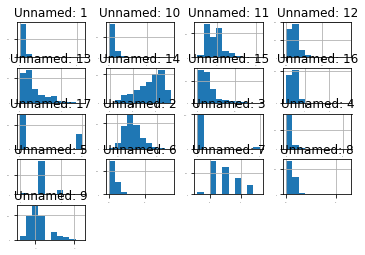

In [0]:
#unimodal visuals
datas.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1)

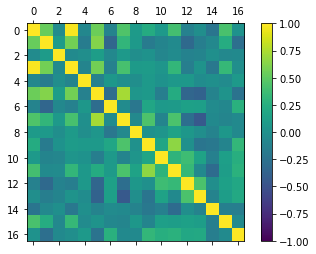

In [0]:
#Multi model Data Visuals
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(datas.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit_transform(datas)

array([[ 1.90754924,  2.04945874, -0.23205116, ..., -0.69607479,
         0.32672909, -0.63417248],
       [ 3.92154176,  2.30556386, -0.23205116, ..., -0.71255242,
         0.81330919, -0.63417248],
       [ 1.82214984,  1.97592034, -0.23205116, ..., -0.71255242,
         0.50732551, -0.63417248],
       ...,
       [ 0.8249598 ,  0.50357117, -0.23205116, ..., -0.77846292,
         0.37469217,  1.50062367],
       [ 1.72144502,  0.67048498, -0.23205116, ..., -0.87732866,
         0.73851039,  1.50062367],
       [ 1.038953  ,  1.57152861, -0.23205116, ..., -0.87732866,
         0.48410269,  1.50062367]])

In [0]:
arr=datas.values
x=arr[:,0:16]
y=arr[:,16:17]
y

array([[  4.],
       [  4.],
       [  4.],
       ...,
       [100.],
       [100.],
       [100.]])

In [0]:
datas=datas.replace('.','',regex=True)

In [0]:
#spliting dataset 

validation_size=0.20 #20%
seed=7#to produce the same results multiple times
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=seed)
(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

((7662, 16), (2554, 16), (7662, 1), (2554, 1))

In [0]:
#evaluation of algorithms
folds=5
seed=7
score='accuracy'

#testing on multiple models
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

#results
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=folds,random_state=seed)
    cv_res=cross_val_score(model,x_train,y_train,cv=kfold,scoring=score)
    results.append(cv_res)
    names.append(name)
    message="classifier:{0}\nAccuracy:{1}\nstd_dev:{2}".format(name, cv_res.mean()*100,cv_res.std())
    print(message)
    print('\n')


C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataCo

classifier:LR
Accuracy:51.853045020003776
std_dev:0.013348349591006928


classifier:LDA
Accuracy:56.46048891318751
std_dev:0.011730196984155268




C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

classifier:KNN
Accuracy:47.91173810630872
std_dev:0.0032838388259507738


classifier:CART
Accuracy:54.137240074326535
std_dev:0.010123715662262943


classifier:NB
Accuracy:45.70609344635598
std_dev:0.008026945751520024




C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

classifier:SVM
Accuracy:53.510872212542516
std_dev:0.006698446085786631




[Text(0, 0, 'LR'),
 Text(0, 0, 'LDA'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM')]

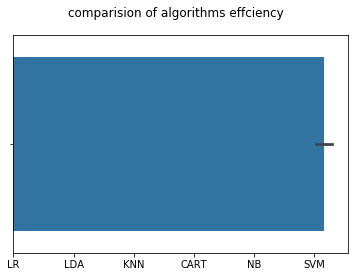

In [0]:
import seaborn as sns
fig=plt.figure()
fig.suptitle("comparision of algorithms effciency")
ax=fig.add_subplot(111)
sns.barplot(results)
ax.set_xticklabels(names)

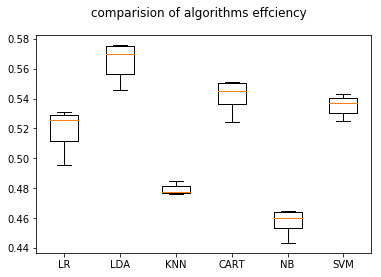

In [0]:
#comparing algorithms via box plot and whisker plot
fig=plt.figure()
fig.suptitle("comparision of algorithms effciency")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
#ensembles
ea=[]

ea.append(('AdaBoost',AdaBoostClassifier()))
ea.append(('GradBoost',GradientBoostingClassifier()))
ea.append(('RandF',RandomForestClassifier()))
ea.append(('ET',ExtraTreesClassifier()))
ea.append(('XGB', XGBClassifier()))

#results prediction
results=[]
names=[]
for name,model in ea:
    kfold=KFold(n_splits=folds,random_state=seed)
    cv_res=cross_val_score(model,x_train,y_train,scoring=score)
    results.append(cv_res)
    names.append(name)
    output="Algorithm:{0}\nAccuracy:{1}\nStdDev:{2}".format(name,cv_res.mean(),cv_res.std())
    print("\n"+output)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_


Algorithm:AdaBoost
Accuracy:0.32825737556294815
StdDev:0.031688939483817444


C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_


Algorithm:GradBoost
Accuracy:0.6329938327795034
StdDev:0.011357398110558041


C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 1


Algorithm:RandF
Accuracy:0.6203368095590999
StdDev:0.005072141582616672

Algorithm:ET
Accuracy:0.6161558067559292
StdDev:0.007220069000658068


C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default va


Algorithm:XGB
Accuracy:0.6290807034836429
StdDev:0.010339578860244114


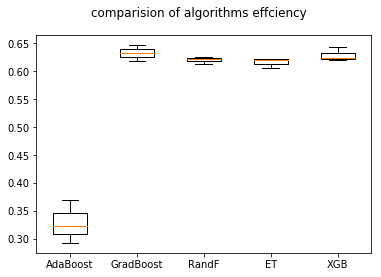

In [0]:
#comparing algorithms via box plot and whisker plot
fig=plt.figure()
fig.suptitle("comparision of algorithms effciency")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()